In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [444]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [445]:
enc = preprocessing.OneHotEncoder()

In [446]:
house_data = house_data.fillna(method = "bfill")
house_data.isnull().sum()

Date                              0
Time                              0
DateTime                          0
System Setting                    0
System Mode                       0
Calendar Event                29548
Program Mode                      0
Cool Set Temp (C)                 0
Heat Set Temp (C)                 0
Current Temp (C)                  0
Current Humidity (%RH)            0
Outdoor Temp (C)                  0
Wind Speed (km/h)                 0
Cool Stage 1 (sec)                0
Heat Stage 1 (sec)                0
Fan (sec)                         0
Thermostat Temperature (C)        0
Thermostat Humidity (%RH)         0
Thermostat Motion                 0
Bedroom (C)                       0
Bedroom2                          0
3rd floor landing (C)             0
3rd floor landing2                0
3rd floor room (C)                0
3rd floor room2                   0
Basement (C)                      0
Basement2                         0
dtype: int64

In [447]:
numerical_vars = ['Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)', 'Outdoor Temp (C)','Thermostat Temperature (C)', 'Thermostat Humidity (%RH)']
sc = StandardScaler()
sc.fit(house_data[numerical_vars])

StandardScaler()

In [448]:
scaler_house_data = house_data[numerical_vars].copy()
scaler_house_data[numerical_vars] = sc.transform(house_data[numerical_vars])
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH)
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776
...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425


In [449]:
y_auxHeat = house_data['Heat Stage 1 (sec)'].to_numpy()
y_fan = house_data['Fan (sec)'].to_numpy()
oe = OrdinalEncoder()
y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))
y_fan = oe.fit_transform(y_fan.reshape(-1, 1))
y_auxHeat = y_auxHeat.reshape(y_auxHeat.shape[0], )
y_fan = y_fan.reshape(y_fan.shape[0], )
y_auxHeat = y_auxHeat.astype(int)
y_auxHeat = y_auxHeat.astype(str)

y_fan = y_fan.astype(int)
y_fan = y_fan.astype(str)
scaler_house_data['Heat Stage 1'] = y_auxHeat
scaler_house_data['fan'] = y_fan

In [450]:
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1,fan
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9,9
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20,20
...,...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0,0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0


In [451]:
working_df = scaler_house_data.drop(labels = ["fan"], axis = 1)
working_df

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20
...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [452]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [453]:
reframed = series_to_supervised(working_df, 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var1(t-5),var2(t-5),var3(t-5),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
6,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,-0.796872,2.183776,20,0.0,-0.225278,2.183776,1.424799,-0.225278,2.183776,20
7,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,20,0.0,0.917909,2.183776,1.424799,0.917909,2.183776,3
8,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,0.917909,2.183776,3,0.0,1.489502,2.183776,1.462204,1.489502,2.183776,0
9,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9,0.0,-1.368465,2.183776,...,1.489502,2.183776,0,0.0,1.489502,2.183776,1.462204,1.489502,2.183776,0
10,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20,0.0,-0.796872,2.183776,...,1.489502,2.183776,0,0.0,0.917909,2.183776,1.462204,0.917909,2.183776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.295068,3.204282,-0.098625,0,0.0,2.632689,-0.605825,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,2.632689,-0.605825,3.295068,2.632689,-0.605825,0,0.0,2.632689,-0.605825,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,2.632689,-0.605825,3.295068,2.632689,-0.605825,0,0.0,2.061095,-0.605825,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [454]:
y_auxHeat = reframed['var7(t)']
y_auxHeat = to_categorical(y_auxHeat)

In [455]:
y_auxHeat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [456]:
test = np.argmax(y_auxHeat, axis = 1)

In [457]:
(unique, counts) = np.unique(test, return_counts = True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    0, 15207],
       [    1,   382],
       [    2,   391],
       [    3,   409],
       [    4,   398],
       [    5,   389],
       [    6,   374],
       [    7,   387],
       [    8,   377],
       [    9,   404],
       [   10,   385],
       [   11,   392],
       [   12,   360],
       [   13,   360],
       [   14,   394],
       [   15,   388],
       [   16,   410],
       [   17,   420],
       [   18,   425],
       [   19,   369],
       [   20,  7049]], dtype=int64)

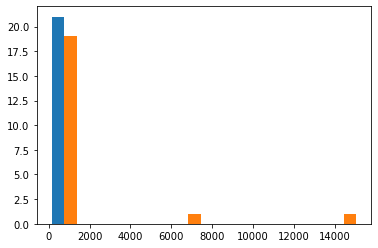

In [458]:
plt.hist(frequencies)
plt.show()

In [459]:
class_weight = class_weight.compute_class_weight('balanced', classes = np.unique(test), y = test)

In [460]:
X = reframed.drop(labels = ['var7(t)'], axis = 1)

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [462]:
# smote =RandomUnderSampler(sampling_strategy = 'all')
# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_train, y_train

In [463]:
test = np.argmax(y_train, axis = 1)

In [464]:
(unique, counts) = np.unique(test, return_counts = True)
frequencies = np.asarray((unique, counts)).T

In [465]:
X_train.shape,X_test.shape

((23736, 48), (5934, 48))

In [466]:
X_train = X_train.values
X_test = X_test.values

In [467]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [468]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 48))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
371/371 [==============================] - 2s 4ms/step - loss: 1.3728 - accuracy: 0.7021 - val_loss: 1.0380 - val_accuracy: 0.7383
Epoch 2/50
371/371 [==============================] - 1s 2ms/step - loss: 0.9675 - accuracy: 0.7462 - val_loss: 0.9510 - val_accuracy: 0.7422
Epoch 3/50
371/371 [==============================] - 1s 2ms/step - loss: 0.9053 - accuracy: 0.7498 - val_loss: 0.9041 - val_accuracy: 0.7459
Epoch 4/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8710 - accuracy: 0.7529 - val_loss: 0.8849 - val_accuracy: 0.7481
Epoch 5/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8498 - accuracy: 0.7543 - val_loss: 0.8689 - val_accuracy: 0.7492
Epoch 6/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8387 - accuracy: 0.7549 - val_loss: 0.8574 - val_accuracy: 0.7509
Epoch 7/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8290 - accuracy: 0.7558 - val_loss: 0.8481 - val_accuracy: 0.7496
Epoch 

In [469]:
classifier.summary()

Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_675 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_676 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_677 (Dense)            (None, 21)                525       
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


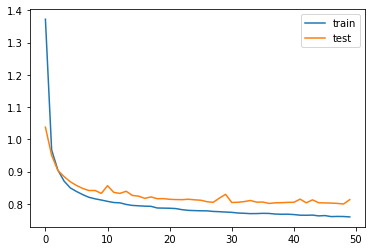

In [470]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.savefig("8.png")
plt.show()

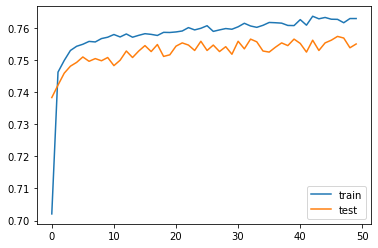

In [471]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.savefig("9.png")
plt.show()

In [472]:
y_predicted = classifier.predict(X_test)

In [473]:
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([ 0, 15,  9, ...,  7,  0,  0], dtype=int64)

In [474]:
y_test = np.argmax(y_test, axis = 1)

In [475]:
test_sum = 0
for i in range(len(y_test)):
    test_sum += (y_test[i] * 15)

In [476]:
test_sum

658965

In [477]:
predicted_sum = 0
for i in range(len(y_predicted)):
    predicted_sum += (y_predicted[i] * 15)

In [478]:
predicted_sum

664050

In [479]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 0.7716646559377205 %


In [480]:
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score

In [481]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)

In [482]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.7293476980033778

In [483]:
accuracy_score(y_train, y_train_predicted)

0.762891809908999

In [484]:
mean_absolute_error(y_train, y_train_predicted)

1.0218233906302663

In [485]:
mean_absolute_error(y_test, y_predicted)

1.0389282103134478

In [486]:
accuracy_score(y_test, y_predicted)

0.7549713515335356

In [487]:
f1_score(y_test, y_predicted, average = 'weighted')

0.7217813710487606

In [488]:
reframed_2 = series_to_supervised(working_df, 12, 1)
reframed_2

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
12,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,0.346315,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
13,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
14,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,-0.225278,2.183776,0,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,17
15,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9,0.0,-1.368465,2.183776,...,-0.796872,2.183776,17,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,20
16,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20,0.0,-0.796872,2.183776,...,-0.796872,2.183776,20,0.0,0.346315,2.183776,1.443502,0.346315,2.183776,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.145447,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [489]:
y_auxHeat = reframed_2['var7(t)']
y_auxHeat = to_categorical(y_auxHeat)
X.shape

(29670, 48)

In [490]:
X = reframed_2.drop(labels = ['var7(t)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [491]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train.shape

(23731, 90)

In [492]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 90))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
371/371 [==============================] - 2s 3ms/step - loss: 1.4048 - accuracy: 0.6597 - val_loss: 1.0490 - val_accuracy: 0.7335
Epoch 2/50
371/371 [==============================] - 1s 2ms/step - loss: 0.9728 - accuracy: 0.7451 - val_loss: 0.9426 - val_accuracy: 0.7413
Epoch 3/50
371/371 [==============================] - 1s 2ms/step - loss: 0.9036 - accuracy: 0.7503 - val_loss: 0.9071 - val_accuracy: 0.7452
Epoch 4/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8688 - accuracy: 0.7533 - val_loss: 0.8663 - val_accuracy: 0.7482
Epoch 5/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8451 - accuracy: 0.7550 - val_loss: 0.8520 - val_accuracy: 0.7490
Epoch 6/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8343 - accuracy: 0.7572 - val_loss: 0.8507 - val_accuracy: 0.7511
Epoch 7/50
371/371 [==============================] - 1s 2ms/step - loss: 0.8283 - accuracy: 0.7570 - val_loss: 0.8389 - val_accuracy: 0.7480
Epoch 

In [493]:
classifier.summary()

Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_678 (Dense)            (None, 24)                2184      
_________________________________________________________________
dense_679 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_680 (Dense)            (None, 21)                525       
Total params: 3,309
Trainable params: 3,309
Non-trainable params: 0
_________________________________________________________________


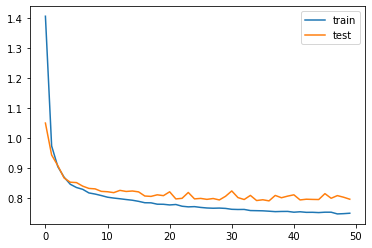

In [494]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.savefig("10.png")
plt.show()

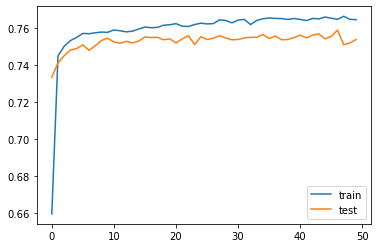

In [495]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.savefig("11.png")
plt.show()

In [496]:
y_predicted = classifier.predict(X_test)
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([ 4, 11,  0, ...,  0,  0, 20], dtype=int64)

In [497]:
y_test = np.argmax(y_test, axis = 1)

In [498]:
test_sum = 0
for i in range(len(y_test)):
    test_sum += (y_test[i] * 15)
test_sum

635385

In [499]:
predicted_sum = 0
for i in range(len(y_predicted)):
    predicted_sum += (y_predicted[i] * 15)

In [500]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 2.7172501711560706 %


In [501]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train_predicted

array([ 0, 20, 19, ...,  0,  0, 20], dtype=int64)

In [502]:
y_train = np.argmax(y_train, axis = 1)

In [503]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.7306096239207006

In [504]:
mean_absolute_error(y_train, y_train_predicted)

0.9616113943786608

In [505]:
accuracy_score(y_train, y_train_predicted)

0.7667186380683494

In [506]:
f1_score(y_test, y_predicted, average = 'weighted')

0.7148701513741895

In [507]:
mean_absolute_error(y_test, y_predicted)

1.0279790999494354

In [508]:
accuracy_score(y_test, y_predicted)

0.7539187594808697

In [509]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [510]:
reframed = series_to_supervised(working_df, 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var1(t-5),var2(t-5),var3(t-5),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
6,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,-0.796872,2.183776,20,0.0,-0.225278,2.183776,1.424799,-0.225278,2.183776,20
7,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,20,0.0,0.917909,2.183776,1.424799,0.917909,2.183776,3
8,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,0.917909,2.183776,3,0.0,1.489502,2.183776,1.462204,1.489502,2.183776,0
9,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9,0.0,-1.368465,2.183776,...,1.489502,2.183776,0,0.0,1.489502,2.183776,1.462204,1.489502,2.183776,0
10,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20,0.0,-0.796872,2.183776,...,1.489502,2.183776,0,0.0,0.917909,2.183776,1.462204,0.917909,2.183776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.295068,3.204282,-0.098625,0,0.0,2.632689,-0.605825,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,2.632689,-0.605825,3.295068,2.632689,-0.605825,0,0.0,2.632689,-0.605825,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,2.632689,-0.605825,3.295068,2.632689,-0.605825,0,0.0,2.061095,-0.605825,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [511]:
y_auxHeat = reframed['var7(t)']
y_auxHeat = to_categorical(y_auxHeat).astype(float)

In [512]:
X = reframed.drop(labels = ['var7(t)'], axis = 1).astype(float)
X.shape

(29670, 48)

In [513]:
def build_classifier(optimizer):

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 48))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [514]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 20)

In [515]:
scoring = {'acc': 'accuracy'}

parameters = {'batch_size' : [10, 64,100],
              'epochs' : [10, 50],
              'optimizer' : ['adam', 'rmsprop']}

In [516]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = scoring,
                           refit = False,
                           cv = 10)

In [517]:
grid_search.fit(X, y_auxHeat)

Epoch 1/10
2671/2671 [==============================] - 4s 1ms/step - loss: 1.0158 - accuracy: 0.7367
Epoch 2/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8485 - accuracy: 0.7550
Epoch 3/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.8195 - accuracy: 0.7571
Epoch 4/10
2671/2671 [==============================] - 6s 2ms/step - loss: 0.8068 - accuracy: 0.7569
Epoch 5/10
2671/2671 [==============================] - 5s 2ms/step - loss: 0.7976 - accuracy: 0.7588
Epoch 6/10
2671/2671 [==============================] - 5s 2ms/step - loss: 0.7917 - accuracy: 0.7584
Epoch 7/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7842 - accuracy: 0.7620
Epoch 8/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7826 - accuracy: 0.7604
Epoch 9/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7795 - accuracy: 0.7612
Epoch 10/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.774

c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _sco

Epoch 1/10
2671/2671 [==============================] - 4s 1ms/step - loss: 1.0170 - accuracy: 0.7402
Epoch 2/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8400 - accuracy: 0.7604
Epoch 3/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8104 - accuracy: 0.7616
Epoch 4/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7995 - accuracy: 0.7615
Epoch 5/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.7907 - accuracy: 0.7626
Epoch 6/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.7857 - accuracy: 0.7629
Epoch 7/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.7804 - accuracy: 0.7633
Epoch 8/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7765 - accuracy: 0.7632
Epoch 9/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.7745 - accuracy: 0.7646
Epoch 10/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.772

c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _sco

Epoch 1/10
2671/2671 [==============================] - 4s 1ms/step - loss: 1.0253 - accuracy: 0.7416
Epoch 2/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8656 - accuracy: 0.7549
Epoch 3/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8358 - accuracy: 0.7562
Epoch 4/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.8226 - accuracy: 0.7575
Epoch 5/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.8113 - accuracy: 0.7574
Epoch 6/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.8041 - accuracy: 0.7607
Epoch 7/10
2671/2671 [==============================] - 3s 1ms/step - loss: 0.7969 - accuracy: 0.7602
Epoch 8/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.7922 - accuracy: 0.7603
Epoch 9/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7880 - accuracy: 0.7604
Epoch 10/10
2671/2671 [==============================] - 5s 2ms/step - loss: 0.784

c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hongyliu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _sco

Epoch 1/10
2671/2671 [==============================] - 4s 1ms/step - loss: 1.0295 - accuracy: 0.7386
Epoch 2/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.8590 - accuracy: 0.7547
Epoch 3/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.8336 - accuracy: 0.7562
Epoch 4/10
2671/2671 [==============================] - 6s 2ms/step - loss: 0.8184 - accuracy: 0.7569
Epoch 5/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.8070 - accuracy: 0.7581
Epoch 6/10
2671/2671 [==============================] - 4s 2ms/step - loss: 0.8029 - accuracy: 0.7584
Epoch 7/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7960 - accuracy: 0.7588
Epoch 8/10
2671/2671 [==============================] - 4s 1ms/step - loss: 0.7911 - accuracy: 0.7590
Epoch 9/10
1251/2671 [=============>................] - ETA: 5s - loss: 0.7886 - accuracy: 0.7575

KeyboardInterrupt: 

In [ ]:
grid_search.cv_results_

In [ ]:
grid_search.get_params

In [ ]:
grid_search_results = pd.DataFrame(grid_search.cv_results_, columns = list(grid_search.cv_results_.keys()))
grid_search_results

### Cross Validation

In [591]:
def build_classifier_relu():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 48))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [592]:
classifier = KerasClassifier(build_fn = build_classifier_relu, batch_size = 64, nb_epoch = 50)

In [575]:
# scoring = {'acc': 'accuracy',
#            }
#scoring = ['accuracy']

In [593]:
ac_funcs = ['relu', 'logistic', 'tanh']
ac_funcs_score_time = []
ac_funcs_acc = []
ac_funcs_f1 = []

In [594]:
X = X.astype(float)
y_auxHeat = y_auxHeat.astype(float)

In [595]:
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

47/47 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.8005


{'fit_time': array([1.45613742, 1.34741712, 1.30852008, 1.23070812, 1.23672771,
        1.2367177 , 1.38033819, 1.25666094, 1.27360797, 1.34641027]),
 'score_time': array([0.30617738, 0.27826047, 0.27726436, 0.26429558, 0.26926851,
        0.323138  , 0.26228786, 0.24534416, 0.25332212, 0.30319262]),
 'test_score': array([0.69666332, 0.68284464, 0.71587461, 0.72901922, 0.71621168,
        0.7394675 , 0.75261205, 0.77789015, 0.80080891, 0.80047184])}

In [596]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])
#ac_funcs_f1.append(scores['test_f1_weighted'])

In [597]:
def build_classifier_sigmoid():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 48))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Adding the output layer
    classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [598]:
X.shape,y_auxHeat.shape

((29670, 48), (29670, 21))

In [599]:
classifier = KerasClassifier(build_fn = build_classifier_sigmoid, batch_size = 64, nb_epoch = 50)

scoring = {'acc': 'accuracy',
           'f1_weighted': 'f1_weighted'}


scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

47/47 [==============================] - 0s 2ms/step - loss: 1.2727 - accuracy: 0.6633


In [600]:
def build_classifier_tanh():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 48))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'tanh'))

    # Adding the output layer
    classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [601]:
classifier = KerasClassifier(build_fn = build_classifier_tanh, batch_size = 64, nb_epoch = 50)

scoring = {'acc': 'accuracy',
           }

scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

47/47 [==============================] - 0s 1ms/step - loss: 0.7791 - accuracy: 0.8022


In [602]:
ac_funcs_acc

[array([0.69666332, 0.68284464, 0.71587461, 0.72901922, 0.71621168,
        0.7394675 , 0.75261205, 0.77789015, 0.80080891, 0.80047184]),
 array([0.45837545, 0.47724974, 0.4967981 , 0.52612066, 0.44017527,
        0.43006405, 0.42938995, 0.57398045, 0.62992924, 0.66329628]),
 array([0.71452647, 0.6771149 , 0.71520054, 0.73238963, 0.72295249,
        0.72463769, 0.73845637, 0.77991235, 0.79946071, 0.80215704])]

In [608]:
acc_df = pd.DataFrame(ac_funcs_acc)
acc_df = acc_df.T

In [610]:
acc_df = acc_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

In [611]:
acc_df

,ReLu,Sigmoid,Tanh
0,0.696663,0.458375,0.714526
1,0.682845,0.477250,0.677115
2,0.715875,0.496798,0.715201
3,0.729019,0.526121,0.732390
4,0.716212,0.440175,0.722952
5,0.739468,0.430064,0.724638
6,0.752612,0.429390,0.738456
7,0.777890,0.573980,0.779912
8,0.800809,0.629929,0.799461
9,0.800472,0.663296,0.802157


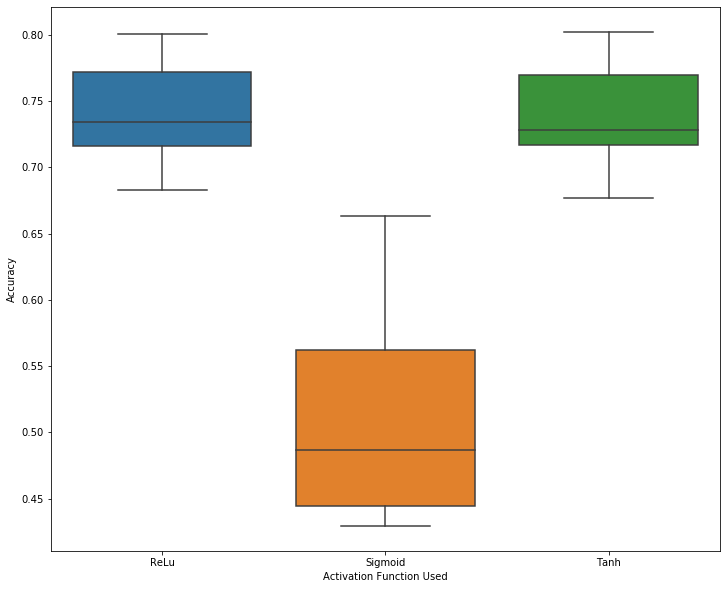

In [605]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = acc_df)
ax.set(ylabel = "Accuracy", xlabel = "Activation Function Used")
plt.savefig("12.png")

In [606]:
# f1_df = pd.DataFrame(ac_funcs_f1)
# f1_df = f1_df.T

# f1_df = f1_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

# plt.figure(figsize = (12, 10))
# ax = sns.boxplot(data = f1_df)
# ax.set(ylabel = "Weighted F1-Score", xlabel = "Activation Function Used")
# plt.savefig("13.png")

ValueError: min() arg is an empty sequence

<Figure size 864x720 with 0 Axes>

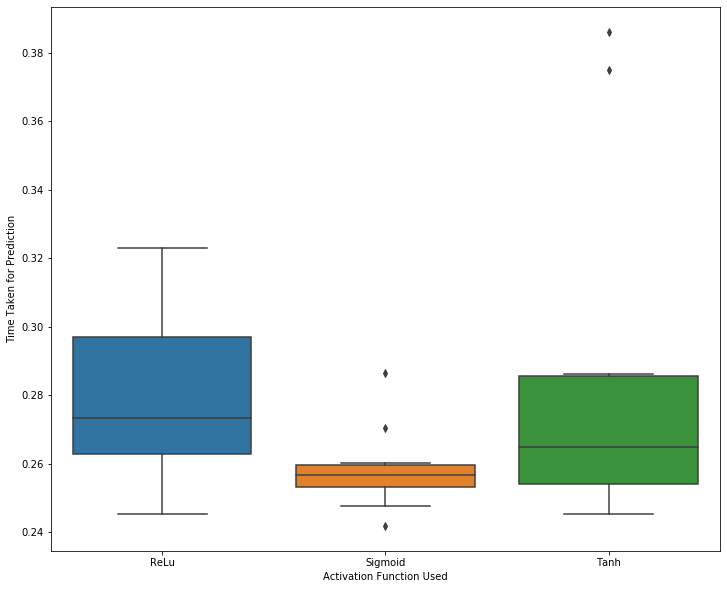

In [607]:
time_df = pd.DataFrame(ac_funcs_score_time)
time_df = time_df.T

time_df = time_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = time_df)
ax.set(ylabel = "Time Taken for Prediction", xlabel = "Activation Function Used")
plt.savefig("14.png")